Getting Started; Openning and Exploring the Data

In [63]:
import pandas as pd
import numpy as np
df = pd.read_excel("dataset_service.xlsx", "noleggio" )
print(df.head())       # View the first few rows

   Anno Fatt.  Num. Fatt. Data Fatt. CUSTOMER    Ord. Servizio  \
0        2021  IA  000001 2021-01-06   cust01  2020/ON  003184   
1        2021  IT  000273 2021-01-31   cust02  2020/ON  007836   
2        2021  IT  000278 2021-01-31   cust03  2020/ON  001385   
3        2021  IT  000279 2021-01-31   cust04  2020/ON  008522   
4        2021  IT  000287 2021-01-31   cust05  2020/ON  008326   

            Inizo nolo            Fine nolo     Bene             Linea POLI  \
0  2020-06-03 00:00:00  2021-04-01 00:00:00  CLI1113  Silver Rent Allestiti   
1  2020-11-18 00:00:00  2021-03-09 00:00:00  CLI1097  Silver Rent Allestiti   
2  2020-02-20 00:00:00  2022-01-21 00:00:00  CLI0973    Silver Rent Furgoni   
3  2020-11-11 00:00:00  2021-06-18 00:00:00  CLI1098    Silver Rent Furgoni   
4  2020-11-30 00:00:00  2021-02-11 00:00:00     A181    Silver Rent Furgoni   

              Linea Bene  \
0  Silver Rent Allestiti   
1   Silver Rent Speciali   
2    Silver Rent Furgoni   
3    Silver Rent

In [64]:
# Step 1: getting to know the data
print(df.info())       # Get data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43117 entries, 0 to 43116
Data columns (total 19 columns):
 #   Column                                                                      Non-Null Count  Dtype         
---  ------                                                                      --------------  -----         
 0   Anno Fatt.                                                                  43117 non-null  int64         
 1   Num. Fatt.                                                                  43117 non-null  object        
 2   Data Fatt.                                                                  43117 non-null  datetime64[ns]
 3   CUSTOMER                                                                    43117 non-null  object        
 4   Ord. Servizio                                                               43117 non-null  object        
 5   Inizo nolo                                                                  43091 non-null  object    

In [65]:
print(df.describe())   # Summary statistics for numerical columns

         Anno Fatt.       Importo  Giornate Vendute  Q.tà (vendita)  \
count  43117.000000  43117.000000      43117.000000    43117.000000   
mean    2022.622794    706.860098          9.373785        6.487059   
std        1.152661    859.054978          9.850304        8.763374   
min     2021.000000   -180.000000         -3.000000        0.000000   
25%     2022.000000    130.000000          1.000000        1.000000   
50%     2023.000000    400.000000          5.000000        3.000000   
75%     2024.000000   1000.000000         20.000000        9.500000   
max     2024.000000  25200.000000        309.000000      828.000000   

              Month  
count  43097.000000  
mean       6.507042  
std        3.418826  
min        1.000000  
25%        4.000000  
50%        6.000000  
75%       10.000000  
max       12.000000  


In [66]:
### Step 2: handling null values, duplicates and anomalities
#  recognize Null values 
df.replace(["N\D", "#N/A", "NA", "nd", "-"], pd.NA, inplace=True)  # Convert specified values to null (NaN)

# Drop duplicated rows
df = df.drop_duplicates()

# Drop null values in specific columns (use the original column names at this step)
df = df.dropna(subset=[
	'Anno Fatt.', 'Num. Fatt.', 'CUSTOMER', 'Ord. Servizio', 'Inizo nolo', 'Fine nolo'
])

In [67]:
## Step 3 : filtering the data
# Convert "Importo" to numeric where possible.
# Non-numeric entries will become NaN.
df["Importo_numeric"] = pd.to_numeric(df["Importo"], errors="coerce")

# Create a filter:
#  - Keep rows where the numeric conversion is NaN (i.e. the original "Importo" could not be converted, likely "-")
#  - Or, where the numeric value is non-negative.
df = df[(df["Importo_numeric"].isna()) | (df["Importo_numeric"] >= 0)].copy()

# Optionally, drop the temporary numeric column if no longer needed.
df.drop(columns=["Importo_numeric"], inplace=True)

# Display the resulting DataFrame.
print(df.head())

   Anno Fatt.  Num. Fatt. Data Fatt. CUSTOMER    Ord. Servizio  \
0        2021  IA  000001 2021-01-06   cust01  2020/ON  003184   
1        2021  IT  000273 2021-01-31   cust02  2020/ON  007836   
2        2021  IT  000278 2021-01-31   cust03  2020/ON  001385   
3        2021  IT  000279 2021-01-31   cust04  2020/ON  008522   
4        2021  IT  000287 2021-01-31   cust05  2020/ON  008326   

            Inizo nolo            Fine nolo     Bene             Linea POLI  \
0  2020-06-03 00:00:00  2021-04-01 00:00:00  CLI1113  Silver Rent Allestiti   
1  2020-11-18 00:00:00  2021-03-09 00:00:00  CLI1097  Silver Rent Allestiti   
2  2020-02-20 00:00:00  2022-01-21 00:00:00  CLI0973    Silver Rent Furgoni   
3  2020-11-11 00:00:00  2021-06-18 00:00:00  CLI1098    Silver Rent Furgoni   
4  2020-11-30 00:00:00  2021-02-11 00:00:00     A181    Silver Rent Furgoni   

              Linea Bene  \
0  Silver Rent Allestiti   
1   Silver Rent Speciali   
2    Silver Rent Furgoni   
3    Silver Rent

In [68]:
## Step 4: Recognizing Date Anomalities
# changing the format to datetime 
df["Inizo nolo"] = pd.to_datetime(df["Inizo nolo"], errors="coerce")
df["Fine nolo"] = pd.to_datetime(df["Fine nolo"], errors="coerce")

# filtering anomalities of time
df_unusual_contracts = df[
    (df["Inizo nolo"] <= pd.Timestamp("2010-01-01")) | 
    (df["Fine nolo"] >= pd.Timestamp("2040-12-31"))
].copy()

# Keeping the useful timeframe
df = df[
    (df["Inizo nolo"] > pd.Timestamp("2010-01-01")) & 
    (df["Fine nolo"] < pd.Timestamp("2040-12-31"))
].copy()

# checkiing the number of rows
print(f"✅ usual contracts {df.shape[0]}")
print(f"❌ unusual contract: {df_unusual_contracts.shape[0]}")

✅ usual contracts 43045
❌ unusual contract: 25


In [69]:
# Display the unusual contracts identified earlier
df_unusual_contracts. head(10)

,Anno Fatt.,Num. Fatt.,Data Fatt.,CUSTOMER,Ord. Servizio,Inizo nolo,Fine nolo,Bene,Linea POLI,Linea Bene,"PRODUCT CATEGORY (IF NA, IF POSSIBLE GET IT FROM LINEA POLI OR LINEA BENE)",Importo,Causale Riga,Giornate Vendute,U.M. (maga),Q.tà (vendita),U.M. (vendita),Linea Final,Month
29563,2024,IT 007863,2024-11-30,cust1109,2024/ON 008827,1900-01-01,NaT,V104,<NA>,<NA>,<NA>,820.0,ADS,41.0,GG,41.0,GG,xxx,11.0
33477,2024,IT 001769,2024-03-26,cust1378,2024/ON 001990,1900-01-01,NaT,S831,Semoventi Girevoli Articolati Dsl,Semoventi Girevoli,semgirevoli_articolato_ele,1520.0,ADN,16.0,GG,16.0,GG,xxx,3.0
33478,2024,IT 001770,2024-03-26,cust1378,2024/ON 001989,1900-01-01,NaT,T102,Sollevatori Telescopici Fissi,Sollevatori Telescopici,sollevatori_fissi,1680.0,ADN,16.0,GG,16.0,GG,xxx,3.0
35481,2024,IT 001550,2024-03-08,cust1378,2024/ON 001989,1900-01-01,NaT,T102,Sollevatori Telescopici Fissi,Sollevatori Telescopici,sollevatori_fissi,420.0,ADN,4.0,GG,4.0,GG,xxx,3.0
35482,2024,IT 001551,2024-03-08,cust1378,2024/ON 001990,1900-01-01,NaT,S831,Semoventi Girevoli Articolati Dsl,Semoventi Girevoli,semgirevoli_articolato_ele,380.0,ADN,4.0,GG,4.0,GG,xxx,3.0
36126,2024,IT 006645,2024-09-30,cust15,2024/CC 000659,1900-01-01,2024-09-19,S614,Semoventi Verticali Ele,Semoventi Verticali,semverticali_ele,105.0,ADN,3.0,GG,3.0,GG,xxx,9.0
36314,2024,IT 000853,2024-02-14,cust669,2024/ON 001124,1900-01-01,NaT,A220,Silver Rent Furgoni,Silver Rent Furgoni,silver_furgoni,115.0,ADS,2.0,GG,2.0,GG,xxx,2.0
36577,2024,IA 000463,2024-06-21,cust1518,2024/ON 004734,1900-01-01,NaT,A229,Silver Rent Furgoni,Silver Rent Furgoni,silver_furgoni,250.0,ADN,2.0,GG,2.0,GG,xxx,6.0
36603,2024,IT 004529,2024-06-30,cust1520,2024/ON 005233,1900-01-01,NaT,S788,Semoventi Girevoli Articolati Dsl,Semoventi Girevoli,semgirevoli_articolato_dsl,200.0,ADN,2.0,GG,2.0,GG,xxx,6.0
36698,2024,IT 005944,2024-08-31,cust120,2024/ON 006468,1900-01-01,NaT,P88,Macchine con Operatore,Macchine con Operatore,macchina_operatore,2240.0,ANC,2.0,H,2.0,GG,xxx,8.0


In [70]:
# Recalculate most recent and oldest dates
print("\n📌 After Filtering:")
print(f"Oldest 'Inizo nolo': {df['Inizo nolo'].min()}")
print(f"Most Recent 'Inizo nolo': {df['Inizo nolo'].max()}")
print(f"Oldest 'Fine nolo': {df['Fine nolo'].min()}")
print(f"Most Recent 'Fine nolo': {df['Fine nolo'].max()}")


📌 After Filtering:
Oldest 'Inizo nolo': 2014-07-22 00:00:00
Most Recent 'Inizo nolo': 2025-01-08 00:00:00
Oldest 'Fine nolo': 2020-11-09 00:00:00
Most Recent 'Fine nolo': 2029-06-30 00:00:00


In [71]:
## Step 5: Renaming Important Columns
df = df.rename(columns={
    "PRODUCT CATEGORY (IF NA, IF POSSIBLE GET IT FROM LINEA POLI OR LINEA BENE)": "Product Category",
    "CUSTOMER": "Customer ID",
    "Anno Fatt.": "Factor Year",
    "Num. Fatt.": "Factor Number",
    "Data Fatt.": "Factor Date",
    "Ord. Servizio": "Order ID",
    "Inizo nolo": "Start of rental",
    "Fine nolo": "End of rental",
    "Bene": "Machine ID",
    "Importo": "Amount",
    "Linea Bene": "Product Group"
})

# Display the column names
print(df.columns)


Index(['Factor Year', 'Factor Number', 'Factor Date', 'Customer ID',
       'Order ID', 'Start of rental', 'End of rental', 'Machine ID',
       'Linea POLI', 'Product Group', 'Product Category', 'Amount',
       'Causale Riga', 'Giornate Vendute', 'U.M. (maga)', 'Q.tà (vendita)',
       'U.M. (vendita)', 'Linea Final', 'Month'],
      dtype='object')


In [72]:
# Step 6: Saving the cleaned data
df.to_csv("cleaned_dataset_service.csv", index=False)  # Save the cleaned DataFrame to a CSV file
# Display the first few rows of the cleaned DataFrame   
print(df.head())  # View the first few rows of the cleaned DataFrame

   Factor Year Factor Number Factor Date Customer ID         Order ID  \
0         2021    IA  000001  2021-01-06      cust01  2020/ON  003184   
1         2021    IT  000273  2021-01-31      cust02  2020/ON  007836   
2         2021    IT  000278  2021-01-31      cust03  2020/ON  001385   
3         2021    IT  000279  2021-01-31      cust04  2020/ON  008522   
4         2021    IT  000287  2021-01-31      cust05  2020/ON  008326   

  Start of rental End of rental Machine ID             Linea POLI  \
0      2020-06-03    2021-04-01    CLI1113  Silver Rent Allestiti   
1      2020-11-18    2021-03-09    CLI1097  Silver Rent Allestiti   
2      2020-02-20    2022-01-21    CLI0973    Silver Rent Furgoni   
3      2020-11-11    2021-06-18    CLI1098    Silver Rent Furgoni   
4      2020-11-30    2021-02-11       A181    Silver Rent Furgoni   

           Product Group  Product Category  Amount Causale Riga  \
0  Silver Rent Allestiti  silver_allestiti  1426.0          ADN   
1   Silver R

General Analysis

In [73]:
# Display all unique values in the 'Product Category' column
print(df['Product Category'].unique())

['silver_allestiti' 'silver_furgoni' nan 'silver_gru'
 'semgirevoli_articolato_ele' 'sollevatori_rotativi' 'gru_ele'
 'veicoli_subnoleggio' 'sollevatori_fissi' 'semverticali_dsl'
 'semverticali_dsl/ele' 'semgirevoli_articolato_dsl' 'autogru'
 'semverticali_ele' 'semgirevoli_telescopico_dsl'
 'semgirevoli_articolato_hyb' 'autocarrate_articolate' 'elevatori_colonna'
 'semgirevoli_ragni' 'semgirevoli_telescopico_ele'
 'attrezzatura_generatore' 'autocarrate_telescopica' 'macchina_operatore'
 'operatori_' <NA> 'accessorio_sollevatore' 'accessorio_autocarrata']


In [74]:
# Remove specified values from the 'Product Category' column in df
values_to_remove = ['accessorio_sollevatore', 'accessorio_autocarrata', 'veicoli_subnoleggio', 'Accessori Gru Elettriche', 'Accessori Sollevatori Telescopici', 'Accessori Vari', 'Piazzalista', "Trasportatore"]
df = df[~df['Product Category'].isin(values_to_remove)].copy()

In [75]:
# Display all unique values in the 'Product Category' column
print(df['Product Group'].unique())

['Silver Rent Allestiti' 'Silver Rent Speciali' 'Silver Rent Furgoni'
 'Silver Rent con Gru' 'Semoventi Girevoli' 'Sollevatori Telescopici'
 'Gru Elettriche' 'Semoventi Verticali' 'Autogru' 'Autocarrate'
 'Elevatori a Colonna' 'Attrezzatura Varia' 'Macchine con Operatore'
 'Operatori' <NA> 'Piazzalista' 'Accessori Sollevatori Telescopici'
 'Accessori Gru Elettriche' 'Accessori Vari' 'Trasportatore']


In [76]:
# Remove specified values from the 'Product Group' column in df
values_to_remove = ['Accessori Gru Elettriche', 'Accessori Sollevatori Telescopici', 'Accessori Sollevatori Telescopici', 'veicoli_subnoleggio','Accessori Vari', "Piazzalista", 'Trasportatore']
df = df[~df['Product Group'].isin(values_to_remove)].copy()
# drop null values in 'Product Group'
df = df.dropna(subset=['Product Group'])

Analysis of Customers

Number of unique customers: 1606


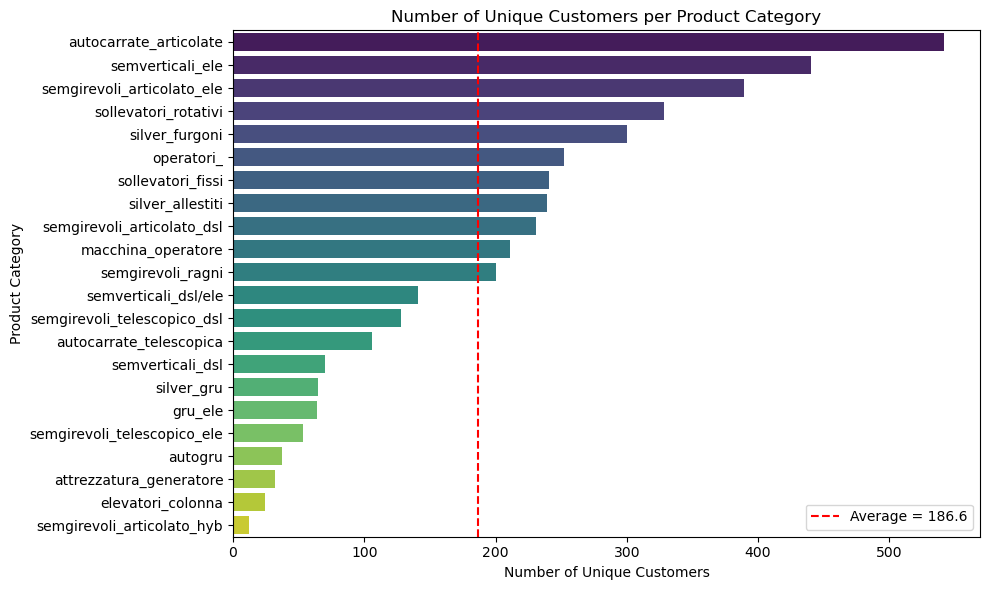

In [77]:
## Recognizing the number of unique customers 
unique_customers = df["Customer ID"].nunique()
print(f"Number of unique customers: {unique_customers}")

# visualization of the N. of unique customers of each product category
import matplotlib.pyplot as plt
import seaborn as sns

unique_by_product = df.groupby("Product Category")["Customer ID"].nunique().sort_values(ascending=False) # Count unique customers per product category

avg_customers = unique_by_product.mean()  # Calculate the average

plt.figure(figsize=(10, 6))  # Plotting
sns.barplot(x=unique_by_product.values, y=unique_by_product.index, palette="viridis")

plt.axvline(avg_customers, color='red', linestyle='--', label=f'Average = {avg_customers:.1f}') # Adding average line

# Final touches
plt.title("Number of Unique Customers per Product Category")
plt.xlabel("Number of Unique Customers")
plt.ylabel("Product Category")
plt.legend()
plt.tight_layout()
plt.show()

This chart reveals the number of unique customers engaging with each product category. Categories such as Autocarrate and Semoventi Girevoli stand out with the highest customer reach, clearly positioning them as core offerings in the portfolio. The red vertical line represents the average number of customers per category, helping to distinguish standout performers from niche or under-utilized product lines.

Insight: Products that exceed the average customer count are likely to be broadly applicable and more scalable. These products should be prioritized for marketing campaigns, bundling strategies, and availability planning, especially during peak demand periods.

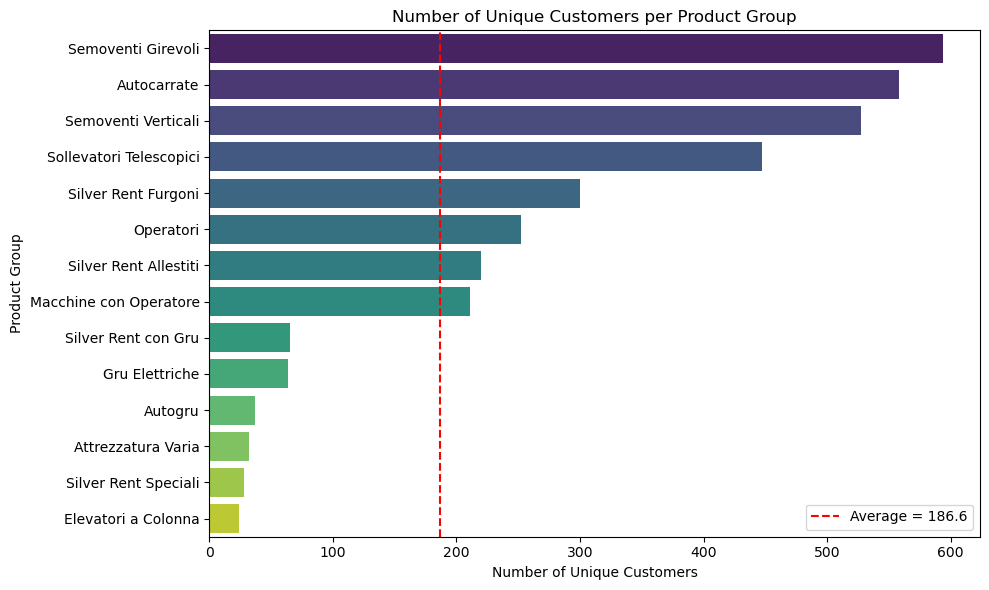

In [78]:
## Analysis of Customers by Product Group
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate unique customers per Product Group
unique_by_product_group = df.groupby("Product Group")["Customer ID"].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=unique_by_product_group.values,
    y=unique_by_product_group.index,
    palette="viridis"
)
plt.axvline(avg_customers, color='red', linestyle='--', label=f'Average = {avg_customers:.1f}')
plt.title("Number of Unique Customers per Product Group")
plt.xlabel("Number of Unique Customers")
plt.ylabel("Product Group")
plt.legend()
plt.tight_layout()
plt.show()


At a more broad level, this chart shows how customer distribution varies across specific product groups. It complements the category-level view by uncovering which precise groups drive the broadest reach.

Insight: Product groups with high customer diversity suggest wide market applicability, making them ideal for upsell and cross-sell initiatives. Groups with lower customer reach may benefit from niche-focused marketing or improved onboarding for first-time users.

Repeat customers: 978
One-time customers: 628
Average number of transactions per customer: 12.663760896637609


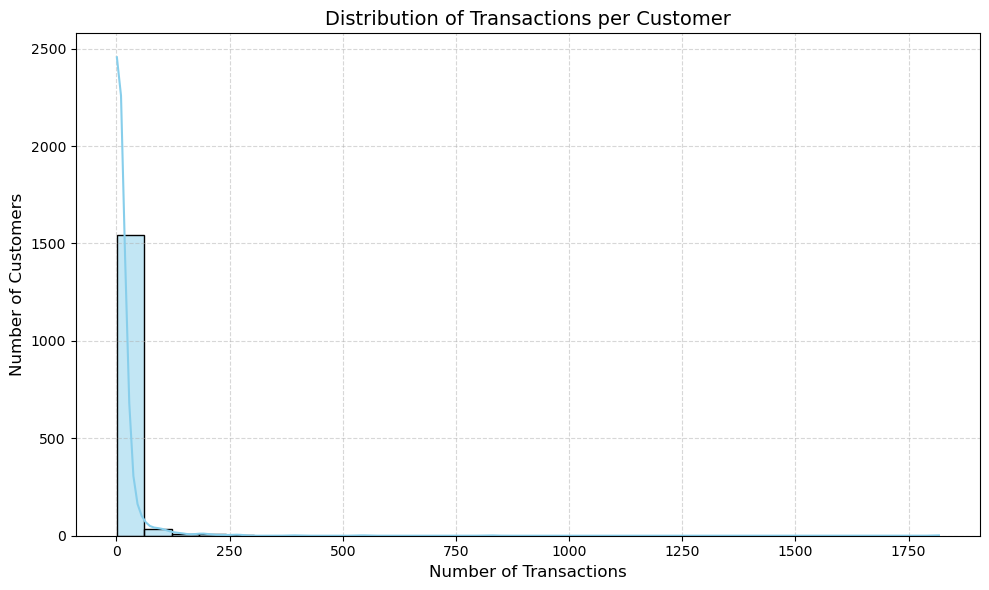

In [79]:
## Distribution of Transaction Frequency per Customer and customer analysis
# Group by "Customer ID" and count unique "Order ID" (contracts)
customer_transaction_counts = df.groupby("Customer ID")["Order ID"].nunique()

# n. of customers having one transaction and more
repeat_customers = (customer_transaction_counts > 1).sum()
one_time_customers = (customer_transaction_counts == 1).sum()

print(f"Repeat customers: {repeat_customers}")
print(f"One-time customers: {one_time_customers}")

# Calculate the average number of transactions per customer
average_transactions = customer_transaction_counts.mean()
print("Average number of transactions per customer:", average_transactions)

# Plot the distribution of transactions per customer
plt.figure(figsize=(10, 6))
sns.histplot(customer_transaction_counts, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of Transactions per Customer", fontsize=14)
plt.xlabel("Number of Transactions", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


This histogram illustrates the distribution of how many orders each customer has made. A significant portion are one-time users, indicating either project-based, ad-hoc demand or lack of re-engagement.

Insight: The high volume of one-time customers is a critical business risk. Implementing automated follow-ups, loyalty programs, or usage-based incentives could increase customer retention and repeat usage—especially for first-time renters.

In [80]:
# checking if each Order ID correspond to a unique product category
# For each unique "Order ID", calculate the number of unique "Product Category" values.
order_mapping = df.groupby('Order ID')['Product Category'].nunique().reset_index(name='Unique_Product_Categories')

# Check Uniqueness
# Orders where the mapping is not unique (i.e., more than one Product Category)
non_unique = order_mapping[order_mapping['Unique_Product_Categories'] > 1]

# Summary statistics: count of orders with a unique mapping vs non-unique.
total_orders = order_mapping.shape[0]
unique_orders = order_mapping[order_mapping['Unique_Product_Categories'] == 1].shape[0]
non_unique_orders = non_unique.shape[0]

print(f"Order ID' count: {total_orders}")
print(f"Orders with a unique 'Product Category': {unique_orders}")
print(f"Orders with more than one 'Product Category': {non_unique_orders}")

if non_unique_orders > 0:
    print("\nOrders with non-unique mappings:")
    print(non_unique)

Order ID' count: 20335
Orders with a unique 'Product Category': 18205
Orders with more than one 'Product Category': 2052

Orders with non-unique mappings:
              Order ID  Unique_Product_Categories
143    2020/ON  007622                          2
204    2020/ON  008822                          2
298    2020/ON  009862                          2
299    2020/ON  009863                          2
300    2020/ON  009877                          2
...                ...                        ...
20188  2024/ON  008906                          2
20225  2024/ON  008989                          2
20232  2024/ON  009009                          2
20269  2024/ON  009098                          2
20324  2024/ON  009323                          2

[2052 rows x 2 columns]


In [81]:
# Find Order IDs with >1 product category, excluding those where the only categories are 'macchina_operatore' and 'operatori_'
exclude_set = {"macchina_operatore", "operatori_"}

# For each multi-category Order ID, get the set of categories
order_cat_map = (
    df[df["Order ID"].isin(order_ids_with_multiple_categories)]
    .groupby("Order ID")["Product Category"]
    .apply(lambda cats: set(cats.dropna()))
)

# Keep only those where, after removing the exclude_set, there is still more than one category left
filtered_order_ids = [
    oid for oid, cats in order_cat_map.items()
    if len(cats - exclude_set) > 1
]

print("Order IDs with >1 product category (excluding only 'macchina_operatore' and 'operatori_'):")
print(filtered_order_ids)

Order IDs with >1 product category (excluding only 'macchina_operatore' and 'operatori_'):
[]


In [82]:
# Show the product categories in the given order_id
order_id = '2023/ON  008795'
categories_in_order = df[df["Order ID"] == order_id]["Product Category"].unique()
print(f"Product categories in Order ID '{order_id}': {categories_in_order}")

Product categories in Order ID '2023/ON  008795': ['semgirevoli_ragni' 'silver_allestiti']


To determine the actual number of contracts that each product category represents, we first made sure that each `Order ID` mapped to a single Product Category; otherwise, a single contract could erroneously inflate counts across several categories and the amount paid per Order ID wouldn’t correspond to only one product. We discovered 18,205 orders corresponded to unique categories while 2,052 orders referred to multiple categories, most frequently combining "macchina\_operatore" with "operatori." Upon closer inspection, it was discovered that when these two occur together, the total amount paid is listed under "macchina\_operatore," indicating that they work as a bundled service. Since this overlap represents a purposeful pairing and signifies a rather close type of service and as the amount for "operatori" is zero or null, in these cases we simply counted the instances of each `Order ID` in both categories. With this method, we can precisely count the number of distinct contracts for each product. A combination of ‘Semgirevoli_ragni' and 'silver_allestiti' was the only other order with this circumstance after this. Among all the orders with only one product category listed in their Order ID, this little number is insignificant (only one order). Because of this, it appeared that calculating the number of unique contracts for each Product Category (PC) would indicate how frequently each was requested.

Total unique contracts: 20335
Total unique Product Categories: 22
          Order ID  Contract Value
0  2014/ON  004777          4400.0
1  2016/ON  000962         12350.0
2  2016/ON  008839          3750.0
3  2016/ON  009439         34650.0
4  2016/ON  009795         24200.0
              Product Category  Contract Frequency
1       autocarrate_articolate                4153
16            semverticali_ele                3255
9   semgirevoli_articolato_ele                2968
7                   operatori_                2056
21        sollevatori_rotativi                2002


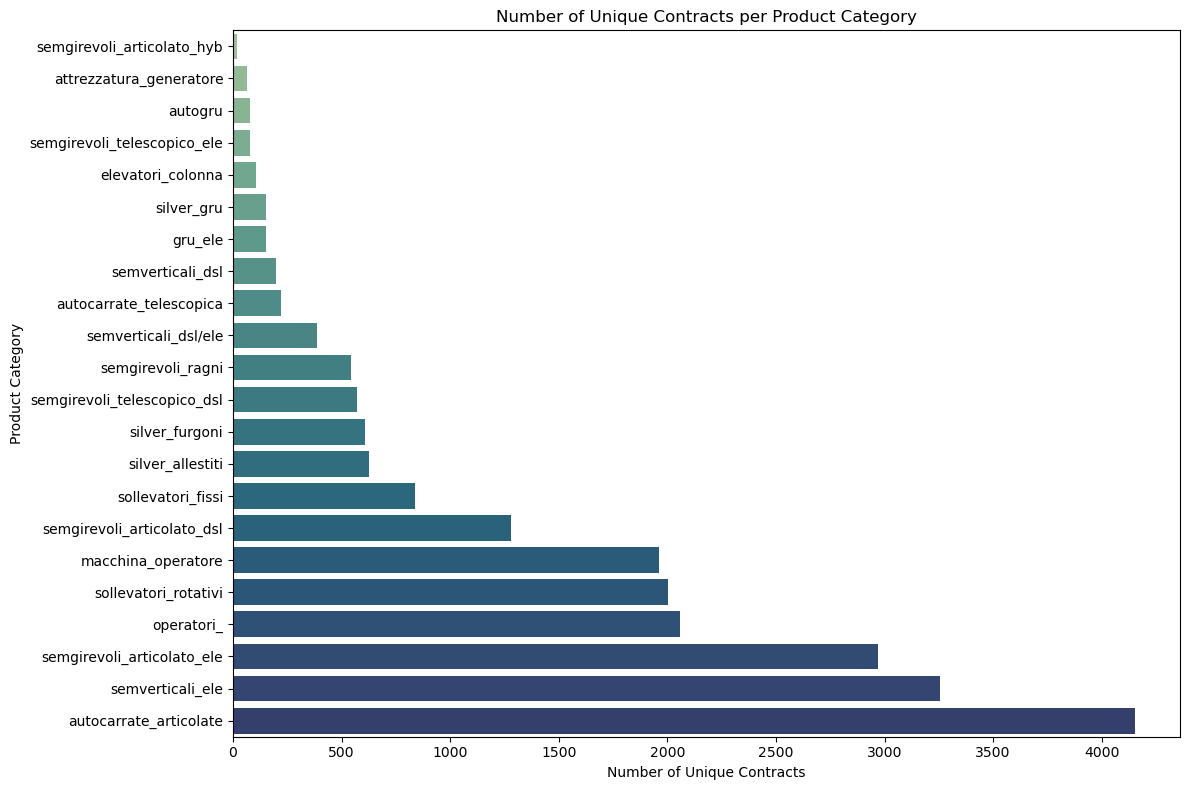

In [83]:
## General Analysis - Analysis of Products
# Number of unique contracts
unique_contracts = df["Order ID"].nunique()
print(f"Total unique contracts: {unique_contracts}")

# Number of unique Product Categories
unique_Product_Categories = df["Product Category"].nunique()
print(f"Total unique Product Categories: {unique_Product_Categories}")

# calculating the value of each contract 
contract_values = df.groupby("Order ID")["Amount"].sum().reset_index(name="Contract Value")
print(contract_values.head()) # Show sample

# the frequency of contract (purchase) for each product category
contract_freq = df.groupby("Product Category")["Order ID"].nunique().reset_index()
contract_freq = contract_freq.rename(columns={"Order ID": "Contract Frequency"})
contract_freq = contract_freq.sort_values(by="Contract Frequency", ascending=False)
print(contract_freq.head())

plt.figure(figsize=(12, 8)) # visualization
sns.barplot(data=contract_freq.sort_values("Contract Frequency", ascending=True),
            y="Product Category", x="Contract Frequency", palette="crest")

plt.title("Number of Unique Contracts per Product Category")
plt.xlabel("Number of Unique Contracts")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


In total, there are 20,335 unique contracts across 22 product categories (excluding accessories). The top three product categories by contract volume—autocarrate_articolate, semverticali_ele, and semgirevoli_articolato_ele—also have the highest number of unique customers, suggesting both scale and reach. A second tier of products (like operatori and sollevatori_rotativi) has strong but less dominant demand, averaging 2,000–2,300 contracts. Meanwhile, some products like silver services do not rank high in contract volume but still attract many unique customers. This indicates they are used less frequently but appeal to a broad customer base—possibly for long-term or occasional needs, which is explored in later sections.



Insight
The alignment between contract volume and unique customer count in the top product categories confirms their position as core, high-frequency offerings. These products should anchor bundling strategies and be prioritized for operational availability. On the other hand, services like Silver, despite low transaction volume, attract a wide audience—suggesting they serve low-frequency but high-value or long-term use cases. These should be targeted with renewal reminders, value-based pricing, or inclusion in project-based packages to boost engagement without needing high frequency.


Total unique contracts: 20335
Total unique Product Group: 14
          Order ID  Contract Value
0  2014/ON  004777          4400.0
1  2016/ON  000962         12350.0
2  2016/ON  008839          3750.0
3  2016/ON  009439         34650.0
4  2016/ON  009795         24200.0
              Product Group  Contract Frequency
7        Semoventi Girevoli                5457
1               Autocarrate                4396
8       Semoventi Verticali                3898
13  Sollevatori Telescopici                2838
6                 Operatori                2056


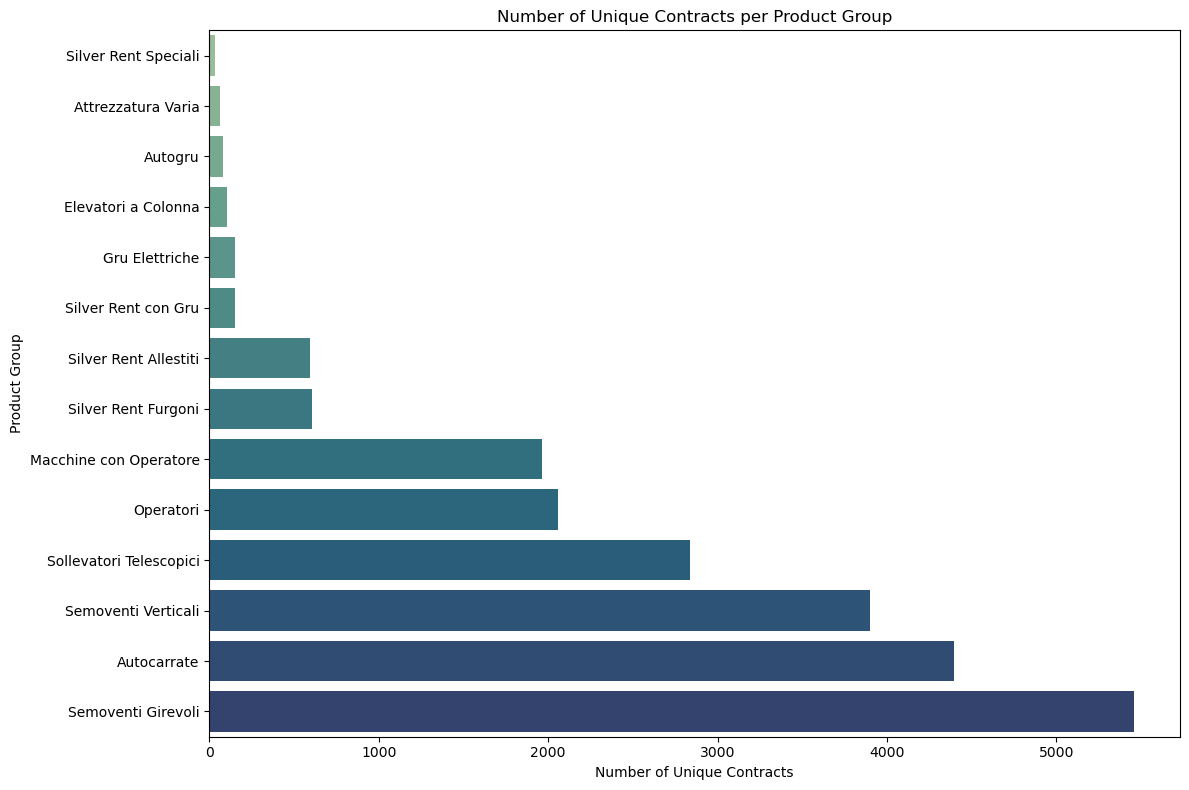

In [84]:
# Number of unique contracts
unique_contracts = df["Order ID"].nunique()
print(f"Total unique contracts: {unique_contracts}")

# Number of unique Product Categories
unique_Product_Categories = df["Product Group"].nunique()
print(f"Total unique Product Group: {unique_Product_Categories}")

# calculating the value of each contract 
contract_values = df.groupby("Order ID")["Amount"].sum().reset_index(name="Contract Value")
print(contract_values.head()) # Show sample

# the frequency of contract (purchase) for each product category
contract_freq = df.groupby("Product Group")["Order ID"].nunique().reset_index()
contract_freq = contract_freq.rename(columns={"Order ID": "Contract Frequency"})
contract_freq = contract_freq.sort_values(by="Contract Frequency", ascending=False)
print(contract_freq.head())

plt.figure(figsize=(12, 8)) # visualization
sns.barplot(data=contract_freq.sort_values("Contract Frequency", ascending=True),
            y="Product Group", x="Contract Frequency", palette="crest")

plt.title("Number of Unique Contracts per Product Group")
plt.xlabel("Number of Unique Contracts")
plt.ylabel("Product Group")
plt.tight_layout()
plt.show()


               Product Category  Distinct_Machine_Count
10   semgirevoli_articolato_hyb                       2
19                   silver_gru                       2
13  semgirevoli_telescopico_ele                       3
0       attrezzatura_generatore                       4
3                       autogru                       4
2       autocarrate_telescopica                       4
5                       gru_ele                       6
6            macchina_operatore                       6
7                    operatori_                       7
14             semverticali_dsl                      13
11            semgirevoli_ragni                      14
15         semverticali_dsl/ele                      15
12  semgirevoli_telescopico_dsl                      25
1        autocarrate_articolate                      34
17             silver_allestiti                      41
18               silver_furgoni                      46
4             elevatori_colonna                 

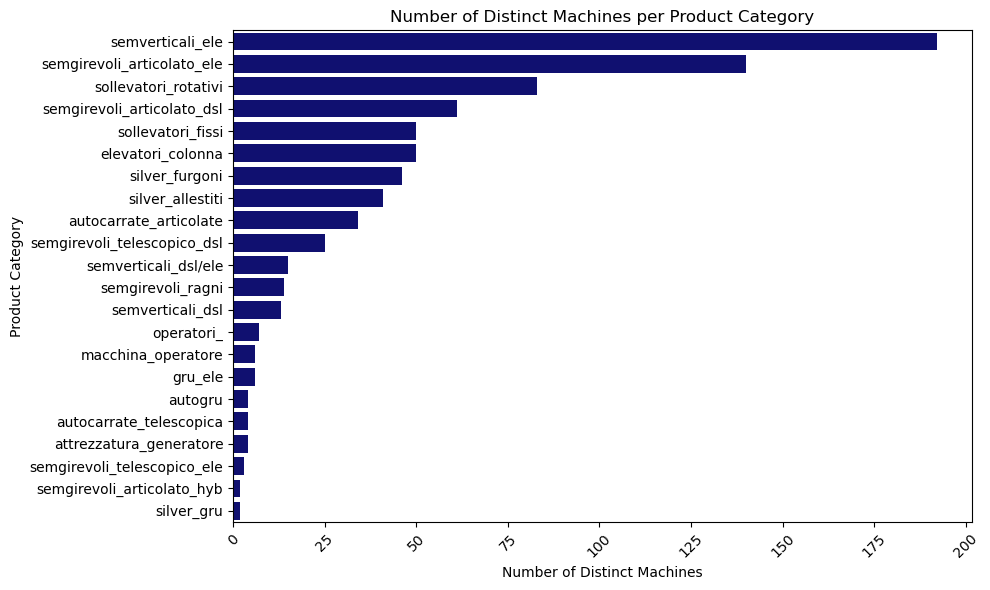

In [85]:
# Count the unique number of Machine IDs per Product Category
distinct_machines_per_category = df.groupby("Product Category")["Machine ID"].nunique().reset_index()
distinct_machines_per_category = distinct_machines_per_category.rename(columns={"Machine ID": "Distinct_Machine_Count"})
print(distinct_machines_per_category.sort_values("Distinct_Machine_Count", ascending=True))

# visualization of the number of distinct machines per product category
plt.figure(figsize=(10, 6))
sns.barplot(
    data=distinct_machines_per_category.sort_values("Distinct_Machine_Count", ascending=False),
    y="Product Category",
    x="Distinct_Machine_Count",
    color="navy"
)
plt.title("Number of Distinct Machines per Product Category")
plt.xlabel("Number of Distinct Machines")
plt.ylabel("Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

PRODUCT QUESTION:  
Is fleet size aligned with product demand?
Should the company invest in expanding certain product fleets, or can demand be met through better utilization of existing assets?

DATA FINDING: 
- semverticali_ele and semgirevoli_articolato_ele show high demand and large fleets, indicating deliberate reinvestment to match market need.
autocarrate_articolate, despite being the most popular product, operates with - A relatively small fleet (~37 machines), suggesting short-term contracts and high turnover make it efficient with limited assets.
- Categories like operatori serve over 2,000 customers with only 5 machines, implying short engagements and fast redeployment.
- Silver services (e.g., silver_furgoni) maintain average fleet size but still attract wide usage, likely for mid- to long-term deployments.

PRODUCT INSIGHT:    
When high demand aligns with a large fleet (e.g., semverticali_ele), asset investment is justified.
But in cases like autocarrate_articolate, performance is driven by turnover speed, not fleet size—meaning optimization, tight scheduling, and reducing idle time are key.
This analysis helps product and operations teams decide where to invest and where to optimize.

In [86]:
# Create Usage Duration
df["Contract Duration (days)"] = (df["End of rental"] - df["Start of rental"]).dt.days

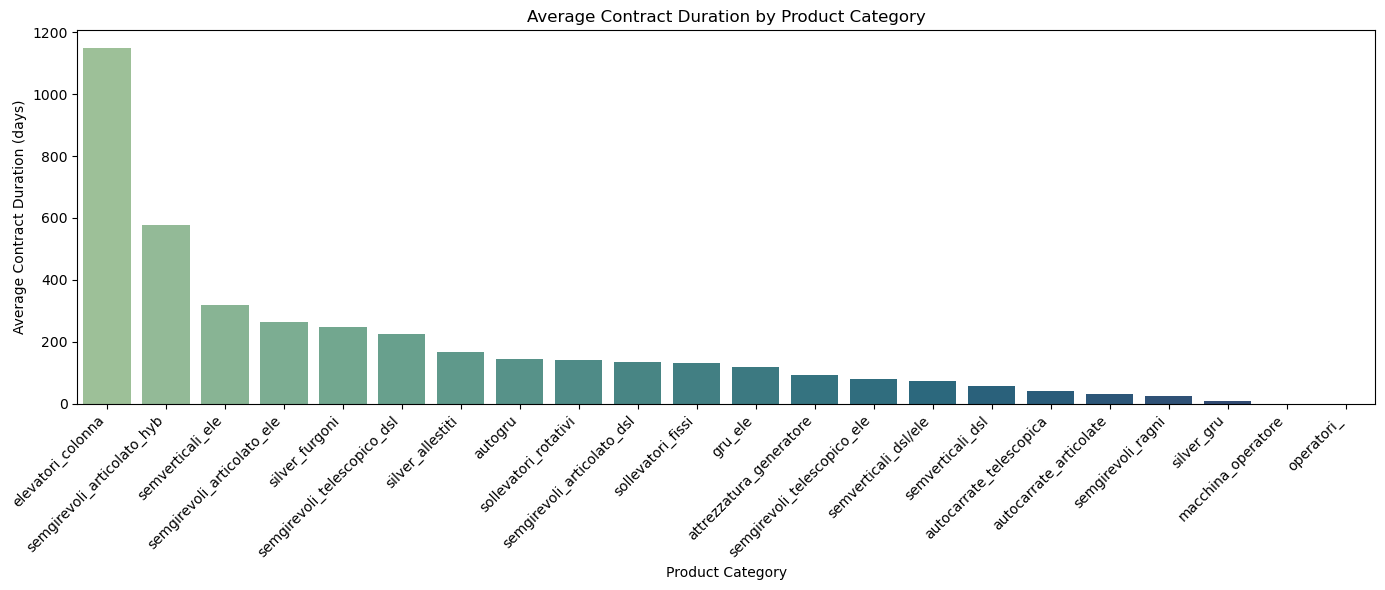

In [87]:
# Calculate average contract duration per product category
import seaborn as sns
import matplotlib.pyplot as plt

avg_contract_duration = (
    df.groupby("Product Category")["Contract Duration (days)"]
    .mean()
    .reset_index()
    .sort_values("Contract Duration (days)", ascending=False)
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=avg_contract_duration,
    x="Product Category",
    y="Contract Duration (days)",
    palette="crest"
)
plt.ylabel("Average Contract Duration (days)")
plt.title("Average Contract Duration by Product Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

PRODUCT QUESTION:   
How does average contract duration vary by product category, and how should that influence fleet strategy and revenue planning?
Are long-term rentals with low demand worth maintaining, or should resources shift toward shorter, high-turnover products?

DATA FINDING: 
- Elevatori_Colonna averages over 1,100 days per contract — the longest rental duration — but has one of the lowest contract counts, raising questions about ROI despite a fleet of ~50 units.
- Semgirevoli_Articolato_Hyb shows similarly long durations (~580 days), but only has two units, serving a niche demand.
- In contrast, Semverticali_ele and Semgirevoli_Articolato_Ele have mid-to-long durations (260–320 days), are popular, and align well with semi-annual or annual projects.
- Secondary lines like Silver_Furgoni and Silver_Allestiti average 150–230 days, fitting mid-term project needs.
- Operatori and Macchina_Operatore, despite average durations of just a few days, meet the needs of thousands of customers due to ultra-high turnover.
- Autocarrate_Articolate, the most frequently rented product, has among the shortest average durations (~days), which explains how just 37 units can cover high-volume, short-term demand efficiently.

PRODUCT INSIGHT:    
Product categories serve distinct time-based use cases—from multi-year infrastructure rentals to daily hires.
High-duration, low-volume products (e.g., Elevatori_Colonna) require close monitoring of ROI to justify fleet size.
Meanwhile, high-demand, short-duration machines (e.g., Autocarrate_Articolate) deliver value through rapid turnover, and should be optimized for availability and maintenance speed.
Mid-range performers with steady durations and strong popularity (Semverticali_ele) offer the best of both worlds and are prime candidates for long-term contract bundling and fleet reinforcement.



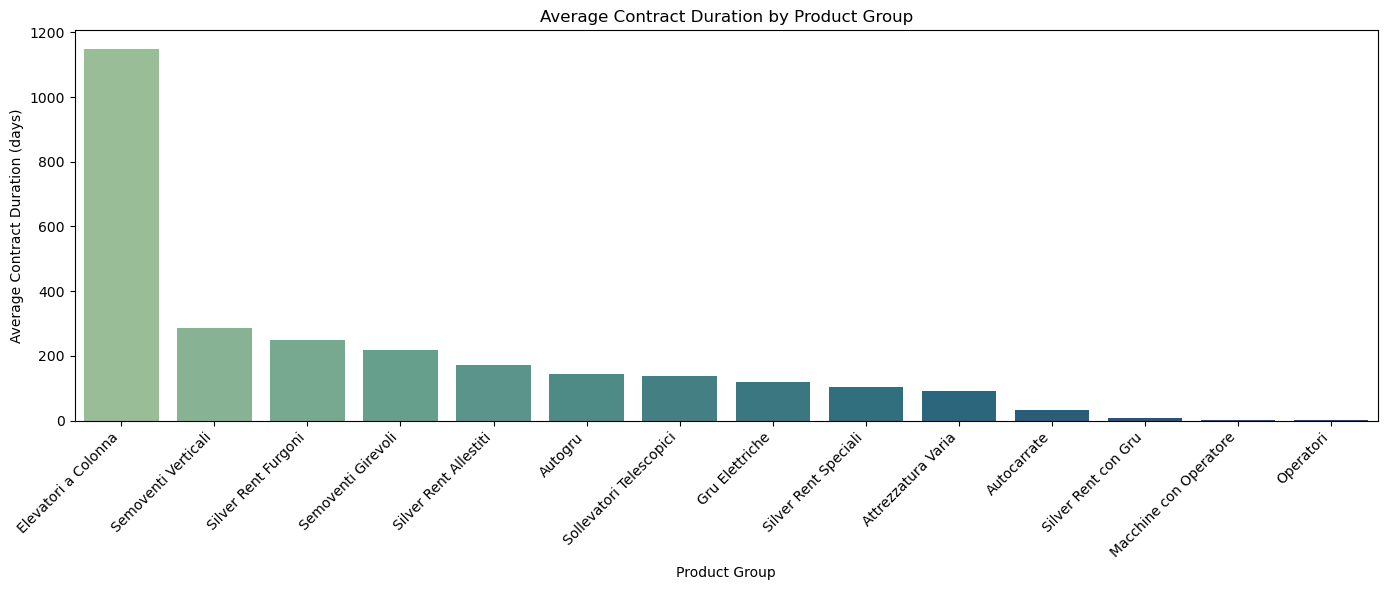

In [88]:
# Calculate average contract duration per product group (MORE GENERAL PERSPECTIVE)
avg_contract_duration = (
    df.groupby("Product Group")["Contract Duration (days)"]
    .mean()
    .reset_index()
    .sort_values("Contract Duration (days)", ascending=False)
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=avg_contract_duration,
    x="Product Group",
    y="Contract Duration (days)",
    palette="crest"
)
plt.ylabel("Average Contract Duration (days)")
plt.title("Average Contract Duration by Product Group")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [89]:
# Calculate the price per day for each contract, excluding Saturdays and Sundays

# Function to count business days (Mon-Fri) between two dates (inclusive of start, exclusive of end)
def count_business_days(start, end):
    if pd.isnull(start) or pd.isnull(end):
        return np.nan
    # np.busday_count excludes the end date, so add 1 day to include the last day if needed
    return np.busday_count(start.date(), (end + pd.Timedelta(days=1)).date())

# Calculate business days for each row
df["Business_Days"] = df.apply(
    lambda row: count_business_days(row["Start of rental"], row["End of rental"]),
    axis=1
)

# Calculate price per business day (exclude weekends)
df["Price_per_business_day"] = np.where(
    (df["Amount"].notnull()) & (df["Business_Days"] > 0),
    df["Amount"] / df["Business_Days"],
    np.nan
)

# Display a sample of the new columns
print(df[["Order ID", "Product Category", "Amount", "Contract Duration (days)", "Business_Days", "Price_per_business_day"]].head(10))

          Order ID  Product Category   Amount  Contract Duration (days)  \
0  2020/ON  003184  silver_allestiti  1426.00                       302   
1  2020/ON  007836  silver_allestiti  1550.00                       111   
2  2020/ON  001385    silver_furgoni   600.00                       701   
3  2020/ON  008522    silver_furgoni   950.00                       219   
4  2020/ON  008326    silver_furgoni   899.00                        73   
5  2020/ON  008031  silver_allestiti  1350.00                       893   
6  2020/ON  009323    silver_furgoni  1240.00                        80   
7  2020/ON  000087  silver_allestiti   850.00                       386   
8  2019/ON  010621  silver_allestiti  1787.77                       986   
9  2020/ON  000528  silver_allestiti  1643.00                       402   

   Business_Days  Price_per_business_day  
0            217                6.571429  
1             80               19.375000  
2            502                1.195219  
3 

In [90]:
# Calculate average price_per_business_day, business_days, and contract duration for each product category
avg_stats = (
    df.groupby("Product Category")
    .agg(
        avg_price_per_business_day=("Price_per_business_day", "mean"),
        avg_business_days=("Business_Days", "mean"),
        avg_contract_duration=("Contract Duration (days)", "mean")
    )
    .reset_index()
    .sort_values("avg_price_per_business_day", ascending=False)
)

print(avg_stats)

               Product Category  avg_price_per_business_day  \
6            macchina_operatore                  877.990626   
5                       gru_ele                  144.903703   
2       autocarrate_telescopica                  137.645854   
19                   silver_gru                  123.480318   
11            semgirevoli_ragni                  115.570751   
1        autocarrate_articolate                  113.255473   
3                       autogru                   98.111672   
21         sollevatori_rotativi                   62.741775   
8    semgirevoli_articolato_dsl                   48.694842   
12  semgirevoli_telescopico_dsl                   47.821702   
13  semgirevoli_telescopico_ele                   42.403910   
17             silver_allestiti                   42.310013   
18               silver_furgoni                   37.956120   
20            sollevatori_fissi                   36.818562   
14             semverticali_dsl                   35.82

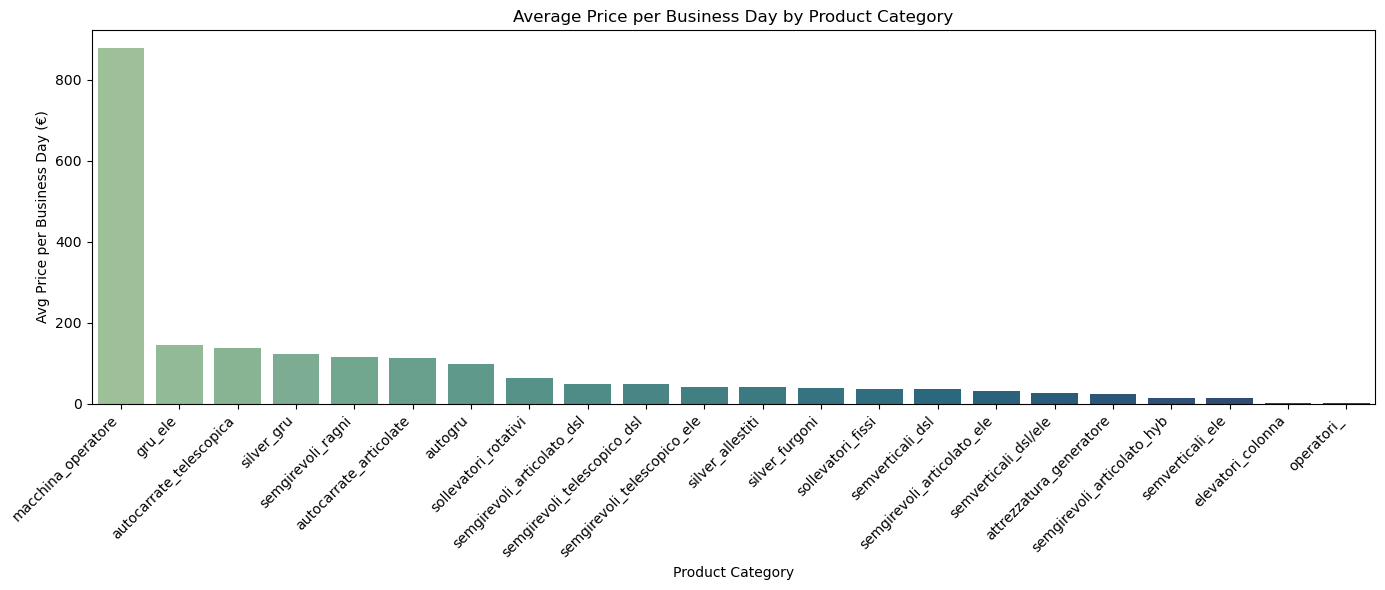

In [91]:
# Visualize only the average price per business day for each product category

plt.figure(figsize=(14, 6))
sns.barplot(
    data=avg_stats.sort_values("avg_price_per_business_day", ascending=False),
    x="Product Category",
    y="avg_price_per_business_day",
    palette="crest"
)
plt.ylabel("Avg Price per Business Day (€)")
plt.title("Average Price per Business Day by Product Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


PRODUCT QUESTION:   
Which product categories generate the highest revenue per day, and how does price relate to demand?
Do higher-priced machines correspond to more frequent rentals, or are they niche, high-margin assets?

DATA FINDING: 
- Average price per day was calculated using total order value divided by business days between rental start and end.
- Macchina_Operatore leads with an average of €900/day, largely due to bundled operator fees.
- Other high-yielding categories include Gru_Ele, Autocarrate_Telescopica, Silver_Gru, and Semgirevoli_Ragni, all falling in the €120–150/day range.
- Interestingly, none of the top 5 most expensive categories are among the most frequently rented, indicating they serve high-value but low-frequency use cases.

PRODUCT INSIGHT:  
Products with the highest daily rates tend to be specialized, low-volume, high-margin assets.
These machines should be positioned as premium services and targeted to projects with urgent, complex, or high-budget needs.
Revenue growth for these categories won't come from volume—but from targeted deployment, value-added services, and guaranteed availability at a premium.
Meanwhile, product lines with lower day-rates but higher turnover (like Autocarrate) remain the backbone of recurring revenue.

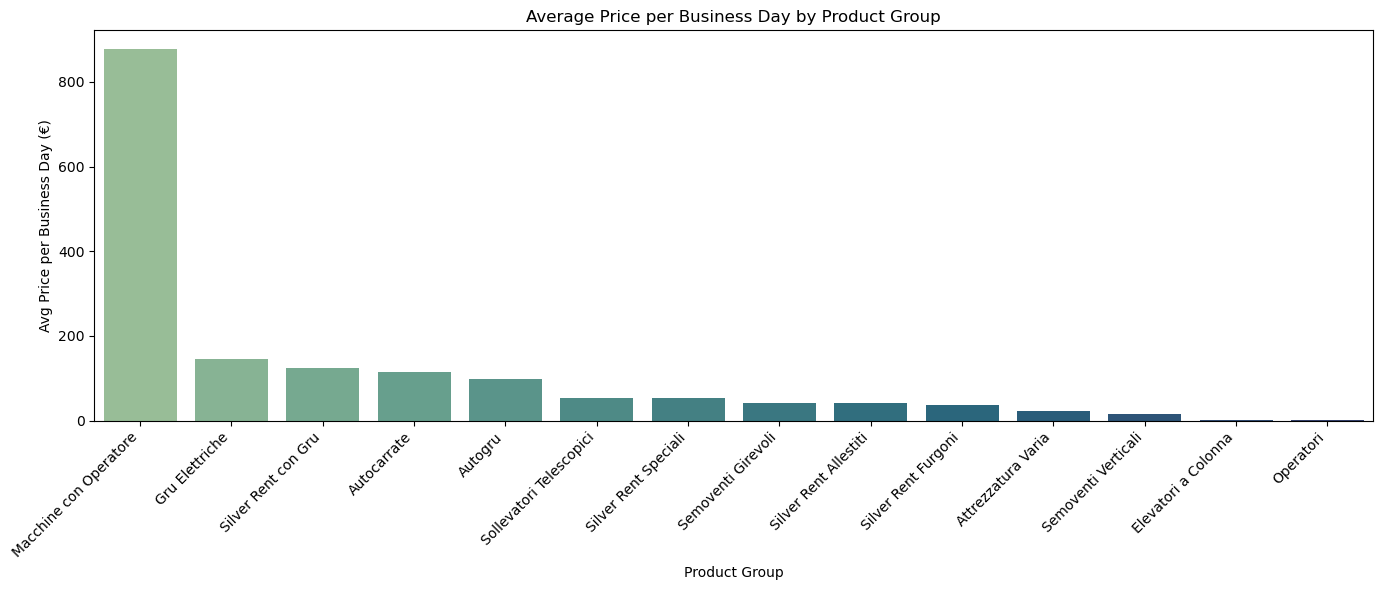

In [92]:
# Calculate average price per business day for each Product Group
avg_price_per_group = (
    df.groupby("Product Group")["Price_per_business_day"]
    .mean()
    .reset_index()
    .sort_values("Price_per_business_day", ascending=False)
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=avg_price_per_group,
    x="Product Group",
    y="Price_per_business_day",
    palette="crest"
)
plt.ylabel("Avg Price per Business Day (€)")
plt.title("Average Price per Business Day by Product Group")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


CONCLUDING INSIGHTS: 
- Autocarrate Articolate: Encourage a small shift toward longer contracts to boost per-unit revenue without overextending fleet capacity.
- Macchina Operatore: Evaluate potential for controlled expansion, possibly via on-call or freelance operators, to unlock more short-term, high-yield rentals.
- Semverticali & Semgirevoli Ele: Maintain current fleet size but consider price-tiering or service bundling to increase margins on long-term contracts.
- Hyb Units: Explore cautious fleet expansion based on actual long-term demand, avoiding overinvestment in a highly specialized asset.
- Semoventi Girevoli: Ideal candidate for tiered rental offerings (short/medium/long), supported by flexible pricing and optional services.
- Elevatori Colonna: Consider repositioning existing fleet for higher-yield shorter contracts, improving cash flow without new investment.

Seasonality Analysis

ANALYSIS QUESTION:  
In the Seasonality Analysis we aim to know: How do rental duration patterns (daily, monthly, annual) vary across product categories throughout the year, and how can this inform fleet planning or marketing timing?

To uncover seasonal demand patterns, contracts were grouped by duration into daily (≤30 days), monthly (31–364), and annual (≥365) types.
Each rental was labeled and analyzed across product categories to reveal how rental length preferences vary over time.
This classification highlights seasonal trends and product-specific usage behaviors tied to project timing and industry cycles.

In [93]:
# Categorize each Order ID based on contract duration
def categorize_rental(duration_days):
    if duration_days < 30:
        return "Daily"
    elif duration_days < 365:
        return "Monthly"
    else:
        return "Annual"

# Calculate contract duration for each Order ID (if not already present)
# Here, we use the already computed "Contract Duration (days)" column
order_duration = df.groupby("Order ID")["Contract Duration (days)"].max().reset_index()

# Apply categorization
order_duration["Rental_Type"] = order_duration["Contract Duration (days)"].apply(categorize_rental)

# Merge back to main DataFrame
df = df.merge(order_duration[["Order ID", "Rental_Type"]], on="Order ID", how="left")

# Show a sample of the result
print(df[["Order ID", "Contract Duration (days)", "Rental_Type"]].head(10))

          Order ID  Contract Duration (days) Rental_Type
0  2020/ON  003184                       302     Monthly
1  2020/ON  007836                       111     Monthly
2  2020/ON  001385                       701      Annual
3  2020/ON  008522                       219     Monthly
4  2020/ON  008326                        73     Monthly
5  2020/ON  008031                       893      Annual
6  2020/ON  009323                        80     Monthly
7  2020/ON  000087                       386      Annual
8  2019/ON  010621                       986      Annual
9  2020/ON  000528                       402      Annual


In [94]:
# Remove annual rental orders from the dataset
df_no_annual = df[df["Rental_Type"] != "Annual"].copy()

# Quick check: show the distribution of Rental_Type in the new dataset
print(df_no_annual["Rental_Type"].value_counts())

Daily      20745
Monthly    11207
Name: Rental_Type, dtype: int64


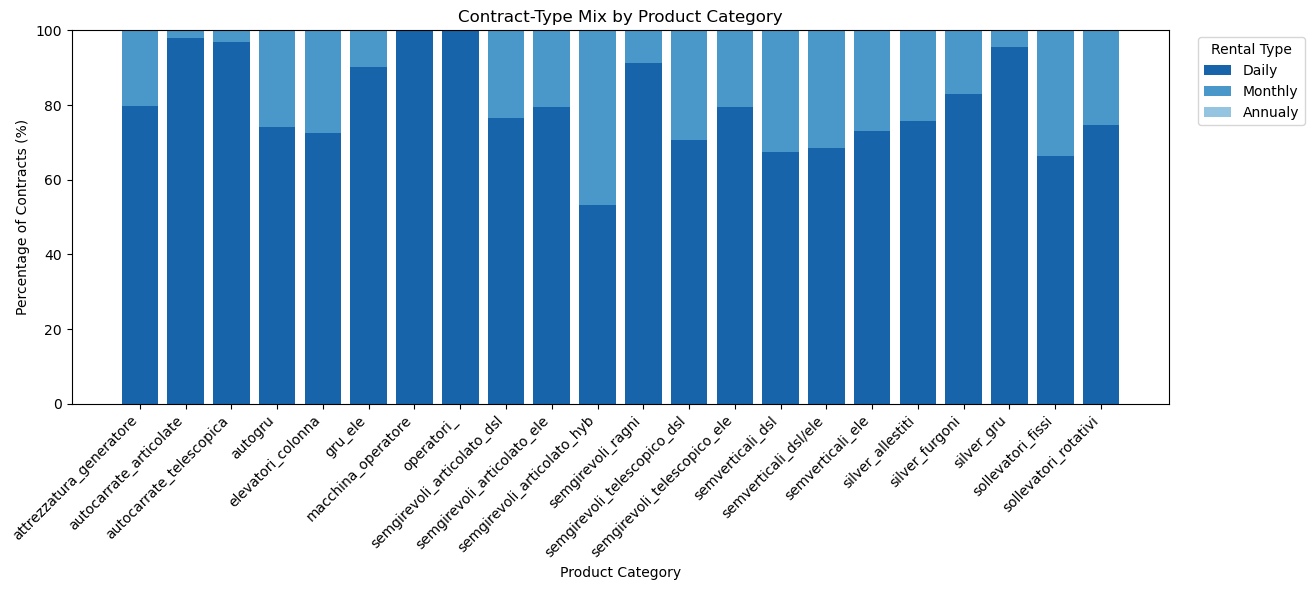

In [95]:
# Calculate the contract-type mix by Product Category as percentages
pivot = (
    df.groupby(['Product Category', 'Rental_Type'])['Order ID']
    .nunique()
    .unstack(fill_value=0)
)

# Reindex columns to ensure correct order
pivot = pivot.reindex(columns=['Daily', 'Monthly', 'Annualy'])

# Convert counts to percentages
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Generate three shades from the Blues colormap
cmap = plt.cm.Blues
navy_shades = [cmap(0.8), cmap(0.6), cmap(0.4)]  # darkest for Daily, then Monthly, then Annualy

fig, ax = plt.subplots(figsize=(14, 6))
bottom = pd.Series(0, index=pivot_pct.index)

for shade, contract_type in zip(navy_shades, pivot_pct.columns):
    ax.bar(
        pivot_pct.index,
        pivot_pct[contract_type],
        bottom=bottom,
        label=contract_type,
        color=shade,
    )
    bottom += pivot_pct[contract_type]

ax.set_ylim(0, 100)
ax.set_ylabel("Percentage of Contracts (%)")
ax.set_xlabel("Product Category")
ax.set_title("Contract‐Type Mix by Product Category")

plt.xticks(rotation=45, ha="right")
plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space on the right for the legend

# Move legend outside the plot
ax.legend(title="Rental Type", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()


ANALYSIS QUESTION:   
How do contract duration preferences differ across product categories, and what does that imply for rental strategy?

DATA FINDING:  
Daily rentals dominate most product categories (70–90%), especially for high-turnover assets like Autocarrate and Semverticali_ele.
Elevatori_Colonna is the only category with significant annual use (~44%), while mid-tier products show a balanced mix of daily and monthly terms.

INSIGHT:  
High-frequency machines thrive on daily rentals and quick turnover, while specialized equipment supports long-term, stable contracts.
Rental plans and fleet allocation should reflect these usage patterns—emphasizing availability and rotation for daily-demand products, and contract stability for long-duration assets.

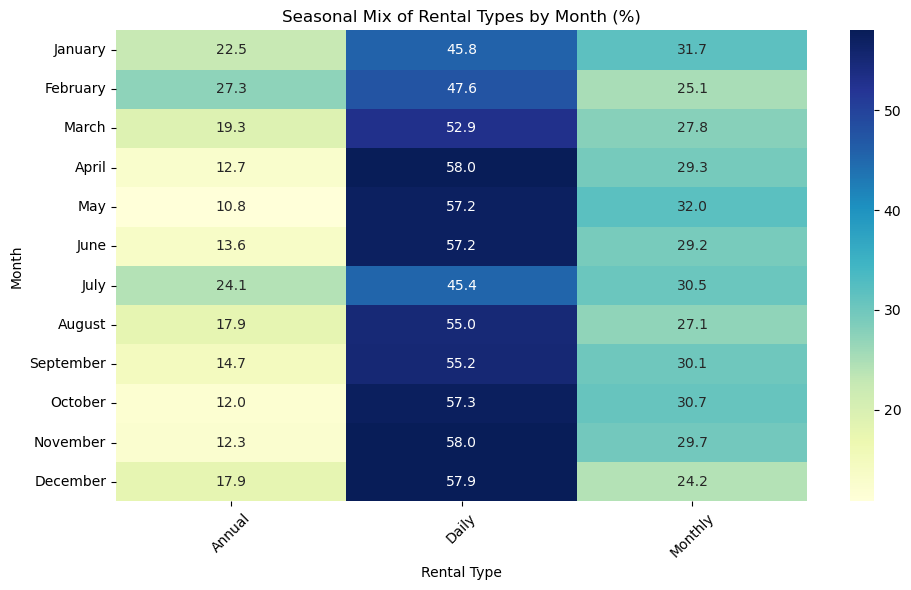

In [96]:
# Seasonal Mix of Rental Types by Month
# 1) Prepare the data
df['Start of rental'] = pd.to_datetime(df['Start of rental'])
df['Month'] = df['Start of rental'].dt.month_name()

# 2) Create pivot of counts
heat_data = df.groupby(['Month', 'Rental_Type']).size().unstack(fill_value=0)

# 3) Reindex rows to calendar order
months_order = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]
heat_data = heat_data.reindex(months_order)

# 4) Convert counts to percentages
heat_pct = heat_data.div(heat_data.sum(axis=1), axis=0) * 100

# 5) Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heat_pct, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Seasonal Mix of Rental Types by Month (%)")
plt.xlabel("Rental Type")
plt.ylabel("Month")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


ANALYSIS QUESTION:  
How does the mix of daily, monthly, and annual contracts vary across the calendar year, and what does this reveal about customer planning behavior and project cycles?

DATA FINDING:  
- Daily rentals dominate in early spring (Mar–Apr) and year-end (Nov–Dec), peaking at 58%, reflecting short-term needs during kickoff and wrap-up phases.
- Annual contracts rise in February (27%) and July (24%), aligning with Q1 budgeting and mid-year project extensions.
- Monthly rentals remain stable (24–32%), peaking in May (32%), suggesting medium-term flexibility during active project phases.

INSIGHTS:  
Customer behavior shows clear planning cycles: short-term rentals surge around budget resets and seasonal transitions, while annual contracts cluster around capital planning windows.
This seasonality can inform contract design, promotional timing, and sales messaging—targeting short-term needs in spring/winter and locking in annual deals in Q1 and mid-year.

C:\Users\SadrSystem\AppData\Local\Temp\ipykernel_10276\2946049139.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_ongoing_per_month.index, rotation=45)


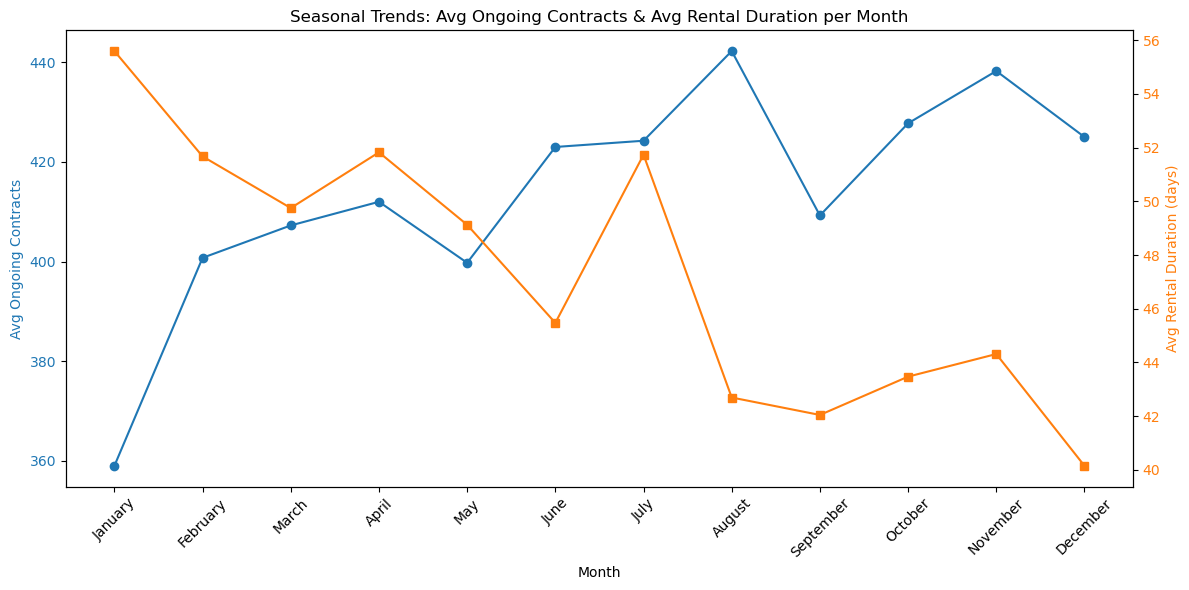

In [97]:
# Calculate the average number of ongoing contracts for each month (across all years)

import calendar
import matplotlib.pyplot as plt

# Ensure ongoing_df is defined
if 'ongoing_df' not in locals():
	# creating snapshot dates for ongoing contracts
	snapshot_start = pd.to_datetime("2021-01-01")
	snapshot_end = pd.to_datetime("2024-12-31")
	snapshot_dates = pd.date_range(start=snapshot_start, end=snapshot_end, freq='MS') + pd.DateOffset(days=14)

	def active_contracts_on(date, df):
		cond = (df["Start of rental"] <= date) & ((df["End of rental"] >= date) | (df["End of rental"].isna()))
		return df.loc[cond, "Order ID"].nunique()

	ongoing_data = []
	for date in snapshot_dates:
		count = active_contracts_on(date, df)
		ongoing_data.append({"Snapshot_Date": date, "Ongoing_Contracts": count})

	ongoing_df = pd.DataFrame(ongoing_data)
	ongoing_df["Year"] = ongoing_df["Snapshot_Date"].dt.year
	ongoing_df["Month"] = ongoing_df["Snapshot_Date"].dt.month.apply(lambda x: calendar.month_name[x])

# If avg_days_per_month is not defined, calculate it from df_no_annual
import calendar

if 'Start_Month' not in df_no_annual.columns:
	df_no_annual["Start_Month"] = df_no_annual["Start of rental"].dt.month.apply(lambda x: calendar.month_name[x])

if 'avg_days_per_month' not in locals():
	avg_days_per_month = df_no_annual.groupby("Start_Month")["Contract Duration (days)"].mean().reindex([
		"January", "February", "March", "April", "May", "June",
		"July", "August", "September", "October", "November", "December"
	])

# Calculate avg_ongoing_per_month from ongoing_df if not already defined
if 'avg_ongoing_per_month' not in locals():
	avg_ongoing_per_month = (
		ongoing_df.groupby("Month")["Ongoing_Contracts"]
		.mean()
		.reindex([
			"January", "February", "March", "April", "May", "June",
			"July", "August", "September", "October", "November", "December"
		])
	)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

color1 = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Ongoing Contracts', color=color1)
ax1.plot(avg_ongoing_per_month.index, avg_ongoing_per_month.values, marker='o', color=color1, label='Avg Ongoing Contracts')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticklabels(avg_ongoing_per_month.index, rotation=45)

# Second y-axis for average days of rental
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('Avg Rental Duration (days)', color=color2)
ax2.plot(avg_days_per_month.index, avg_days_per_month.values, marker='s', color=color2, label='Avg Rental Duration (days)')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Seasonal Trends: Avg Ongoing Contracts & Avg Rental Duration per Month")
fig.tight_layout()
plt.show()


ANALYSIS QUESTION:   
How do rental volume and average contract length fluctuate seasonally, and how should this influence pricing, maintenance, and capacity planning?

DATA FINDING:  
- Contract volume peaks in summer (July–August), while average durations are lowest in May–June, reflecting fast turnover and short-term demand.
- Longer rentals rise in quieter months like January and November, driven by fewer, but more extended projects.
- December shows sharp declines in both volume and duration due to holiday slowdowns and fiscal year-ends.

INSIGHTS:  
High summer volumes require maximum fleet availability and streamlined short-term pricing, while winter offers a chance to focus on long-term contracts and fleet maintenance.
Aligning rental plans, term-based pricing, and service readiness with seasonal rhythms ensures better utilization and revenue optimization throughout the year.



  Rental_Type  Pct_of_4yrs
0      Annual    22.409500
1       Daily    31.379794
2     Monthly    46.210707
  Rental_Type  NormalizedPct
0      Annual      43.648248
1       Daily      26.544503
2     Monthly      29.807249


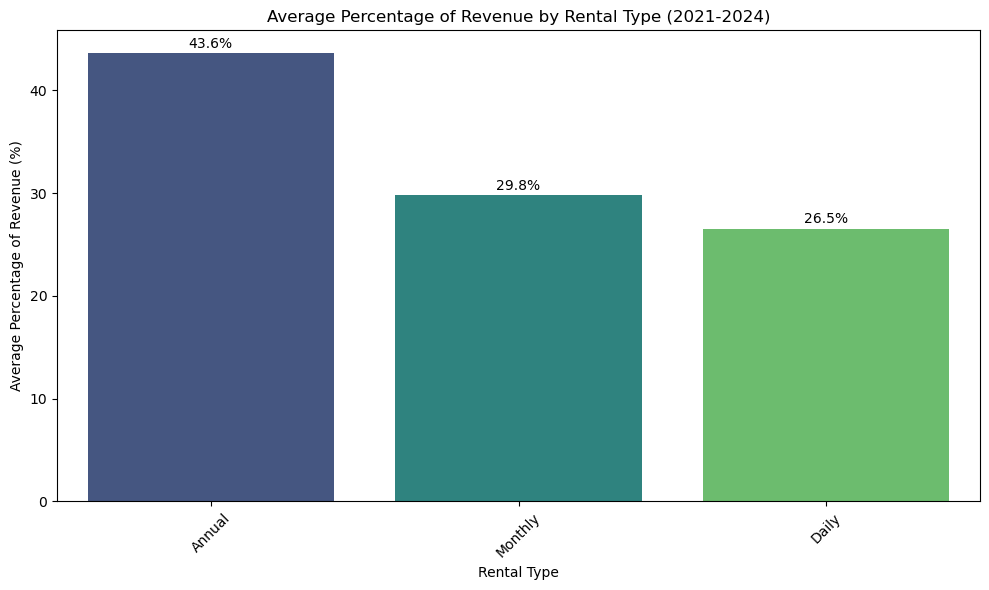

In [98]:
# calculate the total revenue by year and rental type
total_rev_by_type = (
    df
    .groupby('Rental_Type')['Amount']
    .sum()
    .reset_index(name='TotalRevenue')
)
grand_total = total_rev_by_type['TotalRevenue'].sum()
total_rev_by_type['Pct_of_4yrs'] = 100 * total_rev_by_type['TotalRevenue'] / grand_total
print(total_rev_by_type[['Rental_Type','Pct_of_4yrs']])

# Ensure rev_by_year_type exists
rev_by_year_type = (
    df.assign(Year=df['Start of rental'].dt.year)
    .groupby(['Year', 'Rental_Type'])['Amount']
    .sum()
    .reset_index(name='Revenue')
)

rev_by_year_type['Pct'] = (
    rev_by_year_type
    .groupby('Year')['Revenue']
    .transform(lambda x: 100 * x / x.sum())
)
# 4-year average per type
avg_pct = (
    rev_by_year_type
    .groupby('Rental_Type')['Pct']
    .mean()
    .reset_index(name='AvgPct')
)
# Normalize to sum to 100%
total_avg = avg_pct['AvgPct'].sum()
avg_pct['NormalizedPct'] = 100 * avg_pct['AvgPct'] / total_avg
print(avg_pct[['Rental_Type','NormalizedPct']])

# Plotting the average percentage of revenue by rental type
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_pct.sort_values('NormalizedPct', ascending=False),
    x='Rental_Type',
    y='NormalizedPct',
    palette='viridis'
)
plt.title('Average Percentage of Revenue by Rental Type (2021-2024)')
plt.xlabel('Rental Type')
plt.ylabel('Average Percentage of Revenue (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# SHOW THE PERCENTAGE VALUES on the bars
for i, row in avg_pct.sort_values('NormalizedPct', ascending=False).reset_index(drop=True).iterrows():
    plt.text(
        i,
        row['NormalizedPct'] + 0.5,
        f"{row['NormalizedPct']:.1f}%",
        ha='center'
    )

plt.show()



ANALYSIS QUESTION:  
How does each rental type contribute to total revenue, and what strategic adjustments could enhance profitability across durations?

DATA FINDING:  
- Annual contracts bring in the largest share of revenue (~44%), despite being less frequent.
- Monthly rentals follow at ~30%, showing consistent mid-term demand.
- Daily rentals, while common, generate the smallest share (~26.5%), likely due to lower margins.

INSIGHT:  
Annual contracts are the foundation of revenue stability and should be protected with competitive terms and renewal strategies.
Monthly rentals show growth potential—targeted upselling or bundling here could boost returns.
Daily rentals require utilization optimization and seasonal pricing to make their high volume more profitable. A balanced mix ensures long-term resilience and flexibility across market cycles.



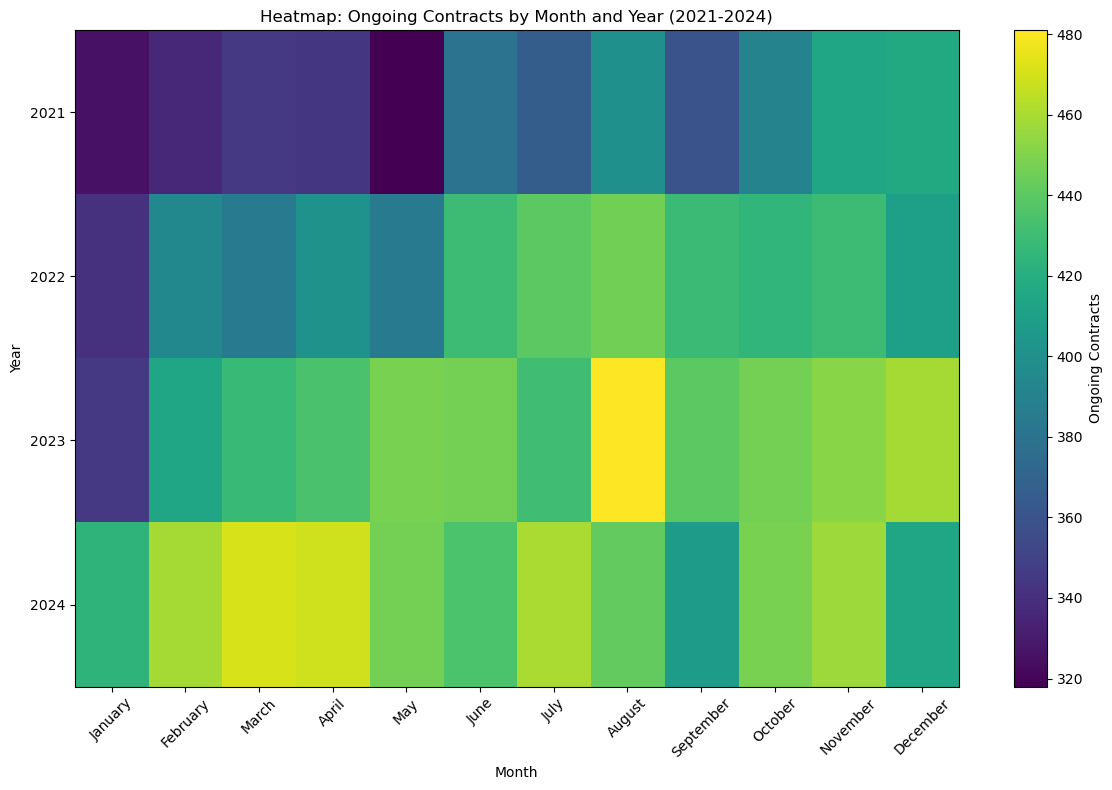

In [99]:
# Ensure the date columns are datetime.
df["Start of rental"] = pd.to_datetime(df["Start of rental"])
df["End of rental"] = pd.to_datetime(df["End of rental"])

# --- Step 1: Define Snapshot Dates ---
# Limit snapshots to the period January 2021 to December 2024.
snapshot_start = pd.to_datetime("2021-01-01")
snapshot_end = pd.to_datetime("2024-12-31")
# Create snapshots on the 15th day of each month.
snapshot_dates = pd.date_range(start=snapshot_start, end=snapshot_end, freq='MS') + pd.DateOffset(days=14)

# --- Step 2: Count Ongoing Contracts for Each Snapshot ---
def active_contracts_on(date, df):
    # A contract is active if its start is on or before the snapshot date and its end is after or equal to the snapshot.
    cond = (df["Start of rental"] <= date) & ((df["End of rental"] >= date) | (df["End of rental"].isna()))
    return df.loc[cond, "Order ID"].nunique()

ongoing_data = []
for date in snapshot_dates:
    count = active_contracts_on(date, df)
    ongoing_data.append({"Snapshot_Date": date, "Ongoing_Contracts": count})
    
ongoing_df = pd.DataFrame(ongoing_data)

# --- Step 3: Extract Year and Month from Snapshot Dates ---
ongoing_df["Year"] = ongoing_df["Snapshot_Date"].dt.year
ongoing_df["Month"] = ongoing_df["Snapshot_Date"].dt.month.apply(lambda x: calendar.month_name[x])

# Define month order.
month_order = list(calendar.month_name)[1:]  # January to December

# --- Step 4: Create a Pivot Table (Year as rows, Month as columns) ---
# Here, each cell represents the number of active contracts on that snapshot.
ongoing_pivot = ongoing_df.pivot(index="Year", columns="Month", values="Ongoing_Contracts").fillna(0)

# Enforce the proper month order.
ongoing_pivot = ongoing_pivot[month_order]

# --- Step 5: Visualization - Heatmap ---
plt.figure(figsize=(12, 8))
plt.imshow(ongoing_pivot, aspect="auto", cmap="viridis")
plt.colorbar(label="Ongoing Contracts")
plt.xticks(ticks=np.arange(len(month_order)), labels=month_order, rotation=45)
plt.yticks(ticks=np.arange(len(ongoing_pivot.index)), labels=ongoing_pivot.index)
plt.title("Heatmap: Ongoing Contracts by Month and Year (2021-2024)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


ANALYSIS QUESTION:  
How have ongoing contract volumes evolved over time, and what seasonal patterns should guide fleet and operational planning?

DATA FINDING:  
- Year-over-year growth: January contracts rose from ~325 in 2021 to >425 in 2024—showing consistent demand expansion.
- Seasonality persists: Each year peaks in August, with lows in winter (Jan–Mar) and minor rebounds in Oct–Nov.
- 2024 stands out with a strong March–April surge and sharper August peak (~485 contracts).

INSIGHTS:    
The business is experiencing both structural growth and cyclical demand.
To keep up, the company must scale fleet and support capacity annually, while still planning for seasonal spikes mid-year and downtime windows in winter for maintenance and fleet rotation.

FINAL REMARKS OF THE SEASONALITY ANALYSIS

The analysis reveals a growing baseline of demand with highly predictable seasonal peaks. From 2021 to 2024, ongoing contracts rose steadily, yet the same intra-year rhythm repeats: low volumes in winter, sharp rises in spring, a summer peak (especially August), and a mild rebound before year-end.

Short-term rentals (daily contracts) dominate spring (March–June) and year-end (Nov–Dec), showing customers’ need for rapid flexibility at project launch and close. Meanwhile, annual contracts, though fewer in number, provide revenue stability—spiking in February (budget resets) and July (mid-project expansions). Monthly leases act as a reliable middle ground, peaking in May when customers shift from initial daily use to more structured mid-term agreements.

This behavioral rhythm suggests a dual pricing and planning strategy:

Maximize volume and turnover through flexible pricing and high availability during peak short-term rental periods.

Secure revenue stability by prioritizing and upselling monthly and annual contracts during seasonal expansion windows.

In short, customers behave pragmatically—favoring long-term deals when budgets align, and shifting to daily contracts when agility is key. The company must respond by aligning fleet, pricing, and promotions with these cyclical patterns to boost both utilization and profitability.

Demand Forecasting

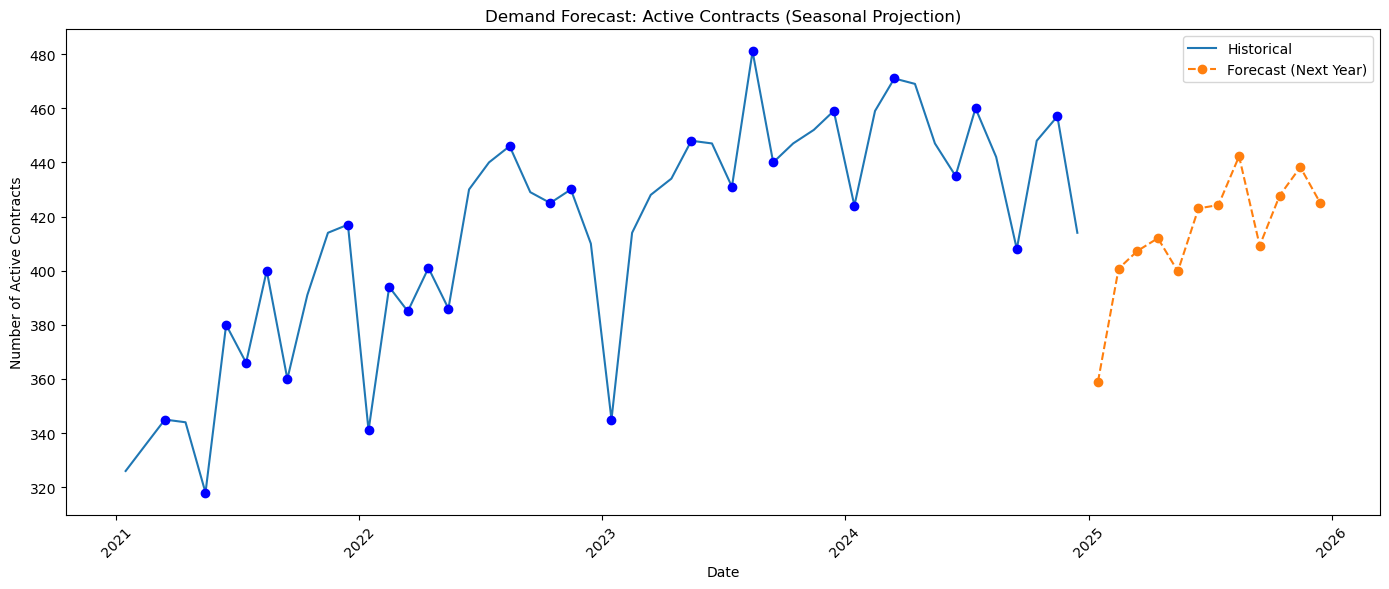

   snapshot_date  forecasted_active_contracts
0     2025-01-15                       359.00
1     2025-02-15                       400.75
2     2025-03-15                       407.25
3     2025-04-15                       412.00
4     2025-05-15                       399.75
5     2025-06-15                       423.00
6     2025-07-15                       424.25
7     2025-08-15                       442.25
8     2025-09-15                       409.25
9     2025-10-15                       427.75
10    2025-11-15                       438.25
11    2025-12-15                       425.00


In [100]:
from scipy.signal import find_peaks

# Use ongoing_df from previous cells, which has 'Ongoing_Contracts' and 'Snapshot_Date'
active_contracts = ongoing_df.rename(columns={
    "Ongoing_Contracts": "active_contracts",
    "Snapshot_Date": "snapshot_date"
})

active_contracts['Month'] = active_contracts['snapshot_date'].dt.month
active_contracts['Year'] = active_contracts['snapshot_date'].dt.year

# Calculate average active contracts per month (seasonality pattern)
monthly_seasonality = (
    active_contracts.groupby('Month')['active_contracts']
    .mean()
    .reindex(range(1, 13))
    .values
)

# Forecast for next year (e.g., 2025)
forecast_year = active_contracts['Year'].max() + 1
# Generate exactly 12 forecast dates, one for each month (on the 15th)
forecast_dates = pd.date_range(
    start=f"{forecast_year}-01-01", periods=12, freq='MS'
) + pd.DateOffset(days=14)

forecast_df = pd.DataFrame({
    'snapshot_date': forecast_dates,
    'forecasted_active_contracts': monthly_seasonality
})

plt.figure(figsize=(14, 6))
plt.plot(active_contracts['snapshot_date'], active_contracts['active_contracts'], label='Historical')
plt.plot(forecast_df['snapshot_date'], forecast_df['forecasted_active_contracts'], 'o--', label='Forecast (Next Year)')

# Highlight peaks (local maxima) in the historical data
# Find peaks (local maxima)
y_hist = active_contracts['active_contracts'].values
peaks, _ = find_peaks(y_hist)
plt.plot(
    active_contracts['snapshot_date'].iloc[peaks],
    y_hist[peaks],
    'bo'
)

# Find lows (local minima) by inverting the signal
lows, _ = find_peaks(-y_hist)
plt.plot(
    active_contracts['snapshot_date'].iloc[lows],
    y_hist[lows],
    'bo'
)

plt.xlabel("Date")
plt.ylabel("Number of Active Contracts")
plt.title("Demand Forecast: Active Contracts (Seasonal Projection)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(forecast_df)


INSIGHT:The seasonal-naïve forecast for 2025 closely tracks the established 2021–2024 pattern, projecting a winter low of ~360 active contracts in January, a steady spring build-up to ~430 by mid-year, and a summer plateau before tapering slightly into autumn. Though it avoids the sharp August 2024 peak (~480), the curve remains smooth and predictably cyclical, reinforcing the reliability of historical patterns.

This intuitive month-by-month forecast provides a practical roadmap for fleet planning, staffing allocation, and maintenance cycles, helping the business match supply with expected demand while minimizing idle capacity during slower seasons.
